In [2]:
import csv
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

Using TensorFlow backend.


In [59]:
FULLDS = pd.read_csv("MergedDSFULL.csv")

C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
FULLDS.head()

text_ID  start   end object value unit   min   max  \
0    46809      0     6     RR   130  NaN   NaN   NaN   
1    43588   2421  2433    ALP    54  U/L   NaN   NaN   
2    43050    720   735    HCT    40    %   NaN  41.2   
3    45389    165   171     RR   110  NaN   NaN   NaN   
4    42960   2314  2332    HCT    45    %  40.0  50.0   

                                                text  
0                                    RR 130/80 mmHg.  
1   UURINGUD JA PROTSEDUURID \nLÄBIVAATUS: Objekt...  
2   UURINGUD JA PROTSEDUURID \n|Uuring|24.04|25.0...  
3  Kergelt liigkaaluline. Nahk, limaskestad taval...  
4   UURINGUD JA PROTSEDUURID \nObjektiivselt: Nor...

In [63]:
FR_DS = FULLDS[FULLDS["object"] == "fr"]

In [65]:
FR_DS = FR_DS[FR_DS['text'].notna()]

In [66]:
FR_Subset = FR_DS[FR_DS['text'].apply(len)<150]


In [66]:
len(DS["text_ID"].unique())

4072

In [71]:
DS.head()

text_ID  start  end object value unit  min  max  \
8      51616     98  103     fr    72  NaN  NaN  NaN   
26    101498     15   23     fr    83   x'  NaN  NaN   
182   189919    105  110     fr    59  NaN  NaN  NaN   
389   346549     84   90     fr   116  NaN  NaN  NaN   
593   546434     40   45     fr    70  NaN  NaN  NaN   

                                                  text  
8    \nNahaleid: puhas\nHingamiselundite leid: vesi...  
26   Cor regul rütm fr 83 x', toonid ii, RR 150/100...  
182  \nNahaleid: puhas\nHingamiselundite leid: vesi...  
389  Praegusel hospitaliseerimisel patsiendi eneset...  
593  \nDgn:M17.1; Z96.6; M48.0; M51.1              ...

In [95]:
DS = FR_Subset.copy()
new_df = pd.DataFrame(DS["text"].str.split().tolist(), index=DS.text_ID).stack()
new_df = new_df.reset_index([0, 'text_ID'])
new_df.columns = ['text_ID', 'word']
new_df["tag"]= np.NaN
myList= list(new_df.text_ID.unique())
for i in range(len(myList)):
    Original = DS.loc[DS["text_ID"] == myList[i]]
    words = new_df.loc[new_df["text_ID"] == myList[i]]
    for OriginalIndex, OriginalRow in Original.iterrows():
        for index, row in words.iterrows():
                if(str(Original["object"][OriginalIndex]) in str(words["word"][index])):
                    new_df["tag"][index] = "object"
                elif(not float(Original["value"][OriginalIndex]).is_integer()):
                    if(Original["value"][OriginalIndex] in str(words["word"][index])):
                        new_df["tag"][index] = "object"
                elif(str(int(Original["value"][OriginalIndex])) in str(words["word"][index])):
                    new_df["tag"][index] = "object"


C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [90]:
not float(18).is_integer()

False

In [100]:
new_df[new_df["tag"]=="object"][50:100]

text_ID                          word     tag
564     32186                            97  object
575     41846                            fr  object
576     41846                         59x`,  object
589     45568                            fr  object
590     45568                            76  object
611     48451                            fr  object
612     48451                         68x`,  object
624     49389                            fr  object
625     49389                           78,  object
642     49874                            fr  object
643     49874                         72x`.  object
652     46651  regulaarne,fr-118/min.140/80  object
660     48240                            fr  object
661     48240                           74x  object
676     48707                           fr:  object
677     48707                            66  object
687     48818                       mmHg,fr  object
688     48818                            67  object
745     53902                            fr  object
746     53902                           90,  object
958     54174                            fr  object
959     54174                           78,  object
978     45488                            fr  object
979     45488                            72  object
1093    49289                            fr  object
1094    49289             89.Gl.th.st.idem,  object
1103    50095                treemor-,fr78,  object
1124    50140                            fr  object
1125    50140                            66  object
1226    54515                            fr  object
1227    54515                      104x',RR  object
1253    58361                            fr  object
1254    58361                            90  object
1390    68552                            fr  object
1391    68552                            72  object
1419    74007                            fr  object
1420    74007                            71  object
1468    70915                            fr  object
1469    70915                         65X`,  object
1473    74596                            fr  object
1474    74596                            77  object
1521    76295                            fr  object
1522    76295                          60X,  object
1593   101962                            fr  object
1594   101962                            80  object
1618   102561                            fr  object
1619   102561                            80  object
1919   103258                            fr  object
1920   103258                            67  object
1976   103386                            fr  object

In [69]:
new_df.to_csv("FR_Object_tagged_Subset_150SentenceLength.csv",index=False)

In [4]:
DS = pd.read_csv("FR_Object_tagged_Subset_150SentenceLength.csv")

In [5]:
DS['tag'].fillna('text', inplace=True)

In [6]:
words = list(set(DS["word"].values))
n_words = len(words)
n_words

9447

In [7]:
tags = list(set(DS["tag"].values))
n_tags = len(tags); n_tags


2

In [8]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("text_ID").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [10]:
getter = SentenceGetter(DS)

In [11]:
sentences = getter.sentences


In [12]:
sentences[1]

[('Saabudes', 'text'),
 ('seisund', 'text'),
 ('stabiilne.', 'text'),
 ('Kopsude', 'text'),
 ('auskultatsioonil', 'text'),
 ('vesikulaarne', 'text'),
 ('hingamiskahin', 'text'),
 ('bilat.', 'text'),
 ('Südametöö', 'text'),
 ('regulaarne,', 'text'),
 ('fr', 'object'),
 ('60', 'object'),
 ('x/min.', 'text'),
 ('Perifeersete', 'text'),
 ('turseteta.', 'text')]

In [13]:
max_len = 150
max_len_char = 10

In [14]:
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [15]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [16]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)


100


In [17]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1 #For predictions
char2idx["PAD"] = 0

In [18]:
idx2char = {i: w for w, i in char2idx.items()}

In [19]:
X_char = []
for sentence in sentences:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))

In [20]:
y = [[tag2idx[w[1]] for w  in s] for s in sentences]


In [21]:
len(sentences)

4072

In [22]:
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [23]:
y[1]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
tag2idx

{'object': 1, 'text': 2, 'PAD': 0}

In [25]:
from sklearn.model_selection import train_test_split
X_char_tr, X_char_te, y_tr,  y_te= train_test_split(X_char, y, test_size=0.8, random_state=2018)


In [26]:
max_len_char

10

In [115]:
from keras.models import load_model
 
# load model
model = load_model('CharacterEmbeddingObject-1.00.hdf5')
# summarize model.
model.summary()

C:\Users\Kasutaja\Anaconda3\envs\myEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 10)           0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 150, 10, 10)       1060      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 150, 20)           2480      
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 150, 20)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 150, 100)          28400     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 150, 3)            303       
Total params: 32,243
Trainable params: 32,243
Non-trainable params: 0
_______________________________________________________

In [100]:
# model.layers[4:]

In [116]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop

# # Saving the best model only
# filepath="CharacterEmbeddingObject-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# for layer in model.layers[:4]:
#     layer.trainable = False
# for layer in model.layers[4:]:
#     layer.trainable = True

early_stopping = EarlyStopping(monitor='val_acc', patience=5)
#https://www.depends-on-the-definition.com/transfer-learning-for-dog-breed-identification/

# model.compile(optimizer=Adam(lr=0.0001, momentum=0.9),
#               loss='sparse_categorical_crossentropy',
#               metrics=["acc"])

# Fit the best model
history = model.fit(np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char)),
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=32, epochs=10, validation_split=0.1, verbose=1)
#,callbacks=callbacks_list

Train on 732 samples, validate on 82 samples
Epoch 1/10
732/732 [==============================] - 7s 9ms/step - loss: 0.1195 - acc: 0.6633 - val_loss: 0.0519 - val_acc: 0.9106
Epoch 2/10
732/732 [==============================] - 5s 7ms/step - loss: 0.0356 - acc: 0.8998 - val_loss: 0.0238 - val_acc: 0.8939
Epoch 3/10
732/732 [==============================] - 5s 7ms/step - loss: 0.0219 - acc: 0.8925 - val_loss: 0.0179 - val_acc: 0.9126
Epoch 4/10
732/732 [==============================] - 5s 7ms/step - loss: 0.0159 - acc: 0.9317 - val_loss: 0.0135 - val_acc: 0.9578
Epoch 5/10
732/732 [==============================] - 5s 7ms/step - loss: 0.0121 - acc: 0.9587 - val_loss: 0.0104 - val_acc: 0.9686
Epoch 6/10
732/732 [==============================] - 5s 7ms/step - loss: 0.0099 - acc: 0.9649 - val_loss: 0.0082 - val_acc: 0.9764
Epoch 7/10
732/732 [==============================] - 5s 7ms/step - loss: 0.0080 - acc: 0.9739 - val_loss: 0.0071 - val_acc: 0.9833
Epoch 8/10
732/732 [===========

In [117]:
model.layers

In [118]:
hist = pd.DataFrame(history.history)


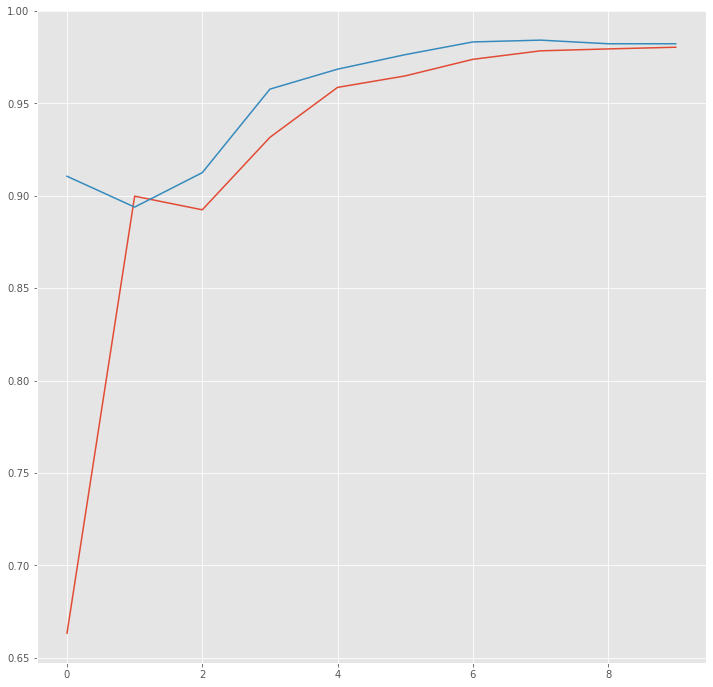

In [119]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()


In [120]:
def charindx2word(Tword):
    word = []
    for i in range(len(Tword)):
        if(Tword[i] !=0):
            word.append(idx2char[Tword[i]])
    return "".join(word)

In [121]:
y_pred = model.predict(
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char)))


In [107]:
len(np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char)))

3258

In [63]:
np.array(X_char_tr).reshape((len(X_char_tr),
                                                     max_len, max_len_char)).shape

(814, 150, 10)

In [122]:
i = 1
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_char_te[i], y_te[i], p):
    if t != 0: #PAD
        print("{:15}: {:5} {}".format(charindx2word(w), idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
EKG            : text  text
Holter:        : text  text
siinusrütm     : text  text
fr             : object object
63-127         : object object
xmin,          : text  text
keskmine       : text  text
sagedus        : text  text
83             : text  text
xmin.          : text  text
Rütmihäire     : text  text
Kokkuvõtva     : text  text
ravi           : text  text
ja             : text  text
plaanid        : text  text
jäävad         : text  text
samaks!        : text  text


In [44]:
len(y_pred)

3258

### Wrong Tags


In [123]:
j = 0
for i in range(len(y_pred)):
    p = np.argmax(y_pred[i], axis=-1)
#     print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
#     print(30 * "=")
    for w, t, pred in zip(X_char_te[i], y_te[i], p):
        if charindx2word(w) != "": #PAD
            if idx2tag[t] != idx2tag[pred]:
                print("{:15}: {:5} {}".format(charindx2word(w), idx2tag[t], idx2tag[pred]))
                j = j+1


700            : text  object
49             : text  object
mmHg,fr79x     : object text
55             : text  object
77             : text  object
74,kaebust     : object text
rütm,fr        : object text
90',PQ         : object text
79             : text  object
67             : text  object
83',Pq-        : object text
mmHg,fr        : object text
mmHg,fr69x     : object text
Normofrekv     : object text
546            : text  object
95             : text  object
65             : text  object
75x´,          : text  object
76,74          : text  object
rütm,fr        : object text
120/80;fr      : object text
99             : text  object
rütm,fr        : object text
64',St         : object text
54-56xmin      : object text
54-56xmin      : object text
131            : object text
366            : text  object
FA.fr          : object text
70/min.        : object text
fibrosikol     : text  object
84             : text  object
82,            : object text
EKG:fr67x'     : object text

58,7           : text  object
58,7           : text  object
104            : object text
ÜÄR            : text  object
17             : text  object
,fr            : object text
50             : object text
82             : text  object
89             : text  object
normofr.       : object text
53xmin.        : object text
115/70,fr      : object text
9)             : text  object
650L/min       : text  object
6)             : text  object
77x´.          : text  object
n"/>:fr        : object text
70,            : object text
fibrillats     : text  object
arütmia,fr     : object text
101,horizo     : object text
fibrillats     : text  object
arütmia,fr     : object text
101,horizo     : object text
80x/min,re     : object text
45             : text  object
103/min,       : object text
koldeleiut     : object text
9)             : text  object
102            : object text
siinusrütm     : object text
89             : text  object
65%;           : text  object
173/90         : object tex

In [124]:
j

702

In [125]:
i = 1001
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_char_te[i], y_te[i], p):
    if t != 0: #PAD
        print("{:15}: {:5} {}".format(charindx2word(w), idx2tag[t], idx2tag[pred]))


Word           ||True ||Pred
05.09.2012     : text  text
-              : text  text
Parem.Süda     : text  text
puuduvad.      : text  text
Hommikuks      : text  text
RR             : text  text
kõrgem.        : text  text
Obj:           : text  text
RR             : text  text
165/60         : text  text
mmHg,          : text  text
fr             : object object
64x            : object object
regul,turs     : text  text
ei             : text  text
ole.           : text  text


In [126]:
from seqeval.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "text"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PAD", "text"))
        out.append(out_i)
    return out

pred_labels = pred2label(y_pred)
test_labels = test2label(y_te)

print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))
print(classification_report(test_labels, pred_labels))


F1-score: 78.2%
           precision    recall  f1-score   support

     text       0.85      0.82      0.83      5198
   object       0.64      0.66      0.65      1992

micro avg       0.79      0.77      0.78      7190
macro avg       0.79      0.77      0.78      7190



In [127]:
accuracy_score(test_labels, pred_labels)

0.9284653161448742

# Overcoming Catastrophic Forgetting 

In [133]:
# from sklearn_crfsuite.metrics import flat_classification_report,flat_accuracy_score
# report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
# print(report)
# print("Accuracy",flat_accuracy_score(y_pred=pred_labels, y_true=test_labels))

In [69]:
# import numpy as np
# import keras.backend as K
# from keras.regularizers import Regularizer


# def computer_fisher(model, imgset, num_sample=30):
#     f_accum = []
#     for i in range(len(model.weights)):
#         f_accum.append(np.zeros(K.int_shape(model.weights[i])))
#     f_accum = np.array(f_accum)
#     for j in range(num_sample):
#         img_index = np.random.randint(imgset.shape[0])
#         for m in range(len(model.weights)):
#             grads = K.gradients(K.log(model.output), model.weights)[m]
#             result = K.function([model.input], [grads])
#             f_accum[m] += np.square(result([np.expand_dims(imgset[img_index], 0)])[0])
#     f_accum /= num_sample
#     return f_accum


# class ewc_reg(Regularizer):
#     def __init__(self, fisher, prior_weights, Lambda=0.1):
#         self.fisher = fisher
#         self.prior_weights = prior_weights
#         self.Lambda = Lambda

#     def __call__(self, x):
#         regularization = 0.
#         regularization += self.Lambda * K.sum(self.fisher * K.square(x - self.prior_weights))
#         return regularization

#     def get_config(self):
#         return {'Lambda': float(self.Lambda)}

In [128]:
# from keras.layers.core import Dense
# # from keras.datasets import mnist
# from keras.models import Sequential
# import numpy as np
# import matplotlib.pyplot as plt
# # from util import computer_fisher, ewc_reg

# # (x_train, y_train), (x_test, y_test) = mnist.load_data()
# # x_train = x_train.astype('float32')
# # x_test = x_test.astype('float32')
# # x_train /= 255
# # x_test /= 255

# # # Original MNIST for Task A
# # x_train = x_train.reshape((-1, 784))
# # x_test = x_test.reshape((-1, 784))

# # Random pixel permutation for Task B
# ind = np.arange(X_char_tr.shape[1])
# np.random.shuffle(ind)
# x_train1 = X_char_tr[:, ind]
# x_test1 = X_char_te[:, ind]
# y_train1 = y_tr
# y_test1 = y_te


# # Task A training and save the prior weights for the next Task
# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim=784))
# model.add(Dense(10, activation='softmax'))
# model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_char_tr, y_tr, 100, 10, validation_data=(X_char_te, y_te))
# model.save('MNISTA.h5')

# # Compute the Fisher Information for each parameter in Task A
# print('Processing Fisher Information...')
# I = computer_fisher(model, X_char_tr)
# print('Processing Finish!')

# # Task B EWC training
# model_ewcB = Sequential()
# model_ewcB.add(Dense(128, activation='relu', input_dim=784, kernel_regularizer=ewc_reg(I[0], model.weights[0]),
#                  bias_regularizer=ewc_reg(I[1], model.weights[1])))
# model_ewcB.add(Dense(10, activation='softmax', kernel_regularizer=ewc_reg(I[2], model.weights[2]),
#                  bias_regularizer=ewc_reg(I[3], model.weights[3])))
# model_ewcB.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
# model_ewcB.load_weights('MNISTA.h5')
# model_ewcB.fit(x_train1, y_train1, 100, 10, validation_data=(x_test1, y_test1))

# # Task B no penalty training
# model_NoP_B = Sequential()
# model_NoP_B.add(Dense(128, activation='relu', input_dim=784))
# model_NoP_B.add(Dense(10, activation='softmax'))
# model_NoP_B.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
# model_NoP_B.load_weights('MNISTA.h5')
# model_NoP_B.fit(x_train1, y_train1, 100, 10, validation_data=(x_test1, y_test1))

# # Current Task Performance
# B_EWC = 100 * model_ewcB.evaluate(x_test1, y_test1, verbose=0)[1]
# B_No_P = 100 * model_NoP_B.evaluate(x_test1, y_test1, verbose=0)[1]
# # Previous Task Performance
# A_EWC = 100 * model_ewcB.evaluate(x_test, y_test, verbose=0)[1]
# A_No_P = 100 * model_NoP_B.evaluate(x_test, y_test, verbose=0)[1]


In [ ]:

# print("Task A Original Accuracy: %.2f%%" % (100 * model.evaluate(X_char_te, y_test)[1]))
# print("Task B EWC method penalty Accuracy: %.2f%%" % B_EWC)
# print("Task B SGD method Accuracy: %.2f%%" % B_No_P)
# print("Task A EWC method penalty Accuracy: %.2f%%" % A_EWC)
# print("Task A SGD method Accuracy: %.2f%%" % A_No_P)

# x = 0
# total_width, n = 0.1, 2
# width = total_width / n
# x = x - (total_width - width) / 2
# plt.style.use('ggplot')
# plt.bar(x, B_EWC, width=width, label='EWC Task B', hatch='w/', ec='w')
# plt.bar(x + width, B_No_P, width=width, label='SGD Task B', hatch='w/', ec='w')
# plt.bar(x + 3.5 * width, A_EWC, width=width, label='EWC Task A', hatch='w/', ec='w')
# plt.bar(x + 4.5 * width, A_No_P, width=width, label='SGD Task A', hatch='w/', ec='w')
# plt.legend(facecolor='white')
# plt.xticks(np.array([0., 3.5 * width]), ('Current', 'Previous'))
# plt.title('EWC method vs SGD method on \n Current task and Previous task')
# plt.xlim(-0.15, 0.35)
# plt.ylim(0., 105.)
# plt.show()